# 1.数据探索性分析

- 数据统计信息: info(), describe(), head()

- 缺失值检查: isnull(), msno包

- 特征分类：类别特征和数字特征

- 目标值的分布转换(转为normal)：简单情况用log




## 0) 载入各种数据科学以及可视化库

In [9]:
#coding:utf-8
#导入warnings包，利用过滤器来实现忽略警告语句。
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## 1) 载入训练集和测试集；

In [10]:
path = './data/'
train = pd.read_csv(path+'used_car_train_20200313.csv', sep=' ')
test = pd.read_csv(path+'used_car_testA_20200313.csv', sep=' ')

## 2) 初步数据探索

In [11]:
train.head(1)

SaleID  name   regDate  model  brand  bodyType  fuelType  gearbox  power  \
0       0   736  20040402   30.0      6       1.0       0.0      0.0     60   

   kilometer  ...       v_5       v_6       v_7       v_8       v_9      v_10  \
0       12.5  ...  0.235676  0.101988  0.129549  0.022816  0.097462 -2.881803   

       v_11      v_12      v_13      v_14  
0  2.804097 -2.420821  0.795292  0.914762  

[1 rows x 31 columns]

In [12]:
print("Shape of training set : {} \nShape of testing set  : {}".format(train.shape, test.shape))

Shape of training set : (150000, 31) 
Shape of testing set  : (50000, 30)


### 2.1) 数据类型

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    125676 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

In [14]:
train.describe()

SaleID           name       regDate          model  \
count  150000.000000  150000.000000  1.500000e+05  149999.000000   
mean    74999.500000   68349.172873  2.003417e+07      47.129021   
std     43301.414527   61103.875095  5.364988e+04      49.536040   
min         0.000000       0.000000  1.991000e+07       0.000000   
25%     37499.750000   11156.000000  1.999091e+07      10.000000   
50%     74999.500000   51638.000000  2.003091e+07      30.000000   
75%    112499.250000  118841.250000  2.007111e+07      66.000000   
max    149999.000000  196812.000000  2.015121e+07     247.000000   

               brand       bodyType       fuelType        gearbox  \
count  150000.000000  145494.000000  141320.000000  144019.000000   
mean        8.052733       1.792369       0.375842       0.224943   
std         7.864956       1.760640       0.548677       0.417546   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       0.000000       0.000000   
50%         6.000000       1.000000       0.000000       0.000000   
75%        13.000000       3.000000       1.000000       0.000000   
max        39.000000       7.000000       6.000000       1.000000   

               power      kilometer  ...            v_5            v_6  \
count  150000.000000  150000.000000  ...  150000.000000  150000.000000   
mean      119.316547      12.597160  ...       0.248204       0.044923   
std       177.168419       3.919576  ...       0.045804       0.051743   
min         0.000000       0.500000  ...       0.000000       0.000000   
25%        75.000000      12.500000  ...       0.243615       0.000038   
50%       110.000000      15.000000  ...       0.257798       0.000812   
75%       150.000000      15.000000  ...       0.265297       0.102009   
max     19312.000000      15.000000  ...       0.291838       0.151420   

                 v_7            v_8            v_9           v_10  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean        0.124692       0.058144       0.061996      -0.001000   
std         0.201410       0.029186       0.035692       3.772386   
min         0.000000       0.000000       0.000000      -9.168192   
25%         0.062474       0.035334       0.033930      -3.722303   
50%         0.095866       0.057014       0.058484       1.624076   
75%         0.125243       0.079382       0.087491       2.844357   
max         1.404936       0.160791       0.222787      12.357011   

                v_11           v_12           v_13           v_14  
count  150000.000000  150000.000000  150000.000000  150000.000000  
mean        0.009035       0.004813       0.000313      -0.000688  
std         3.286071       2.517478       1.288988       1.038685  
min        -5.558207      -9.639552      -4.153899      -6.546556  
25%        -1.951543      -1.871846      -1.057789      -0.437034  
50%        -0.358053      -0.130753      -0.036245       0.141246  
75%         1.255022       1.776933       0.942813       0.680378  
max        18.819042      13.847792      11.147669       8.658418  

[8 rows x 30 columns]

有特征的count小于150000， 说明数据中存在缺失值

In [15]:
train["notRepairedDamage"].describe()

count     150000
unique         3
top          0.0
freq      111361
Name: notRepairedDamage, dtype: object

In [16]:
train['notRepairedDamage'].replace('-', np.nan, inplace=True)
test['notRepairedDamage'].replace('-', np.nan, inplace=True)
print("notRepairedDamage feature\n\nTraining set value count:\n{}\n\nTesting set value count:\n{}".format(train['notRepairedDamage'].value_counts(), test['notRepairedDamage'].value_counts()))

notRepairedDamage feature

Training set value count:
0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

Testing set value count:
0.0    37249
1.0     4720
Name: notRepairedDamage, dtype: int64


notRepairedDamage特征是一个含有缺失值的binary值

## 3) 判断数据缺失和异常

In [17]:
train.isnull().sum()/train.shape[0]

SaleID               0.000000
name                 0.000000
regDate              0.000000
model                0.000007
brand                0.000000
bodyType             0.030040
fuelType             0.057867
gearbox              0.039873
power                0.000000
kilometer            0.000000
notRepairedDamage    0.162160
regionCode           0.000000
seller               0.000000
offerType            0.000000
creatDate            0.000000
price                0.000000
v_0                  0.000000
v_1                  0.000000
v_2                  0.000000
v_3                  0.000000
v_4                  0.000000
v_5                  0.000000
v_6                  0.000000
v_7                  0.000000
v_8                  0.000000
v_9                  0.000000
v_10                 0.000000
v_11                 0.000000
v_12                 0.000000
v_13                 0.000000
v_14                 0.000000
dtype: float64

In [18]:
test.isnull().sum()/test.shape[0]

SaleID               0.00000
name                 0.00000
regDate              0.00000
model                0.00000
brand                0.00000
bodyType             0.02826
fuelType             0.05786
gearbox              0.03820
power                0.00000
kilometer            0.00000
notRepairedDamage    0.16062
regionCode           0.00000
seller               0.00000
offerType            0.00000
creatDate            0.00000
v_0                  0.00000
v_1                  0.00000
v_2                  0.00000
v_3                  0.00000
v_4                  0.00000
v_5                  0.00000
v_6                  0.00000
v_7                  0.00000
v_8                  0.00000
v_9                  0.00000
v_10                 0.00000
v_11                 0.00000
v_12                 0.00000
v_13                 0.00000
v_14                 0.00000
dtype: float64

训练和测试集呈现相近的缺失情况

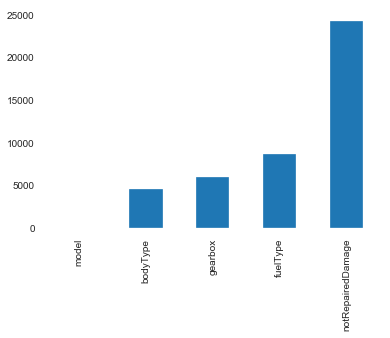

In [19]:
# nan可视化
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

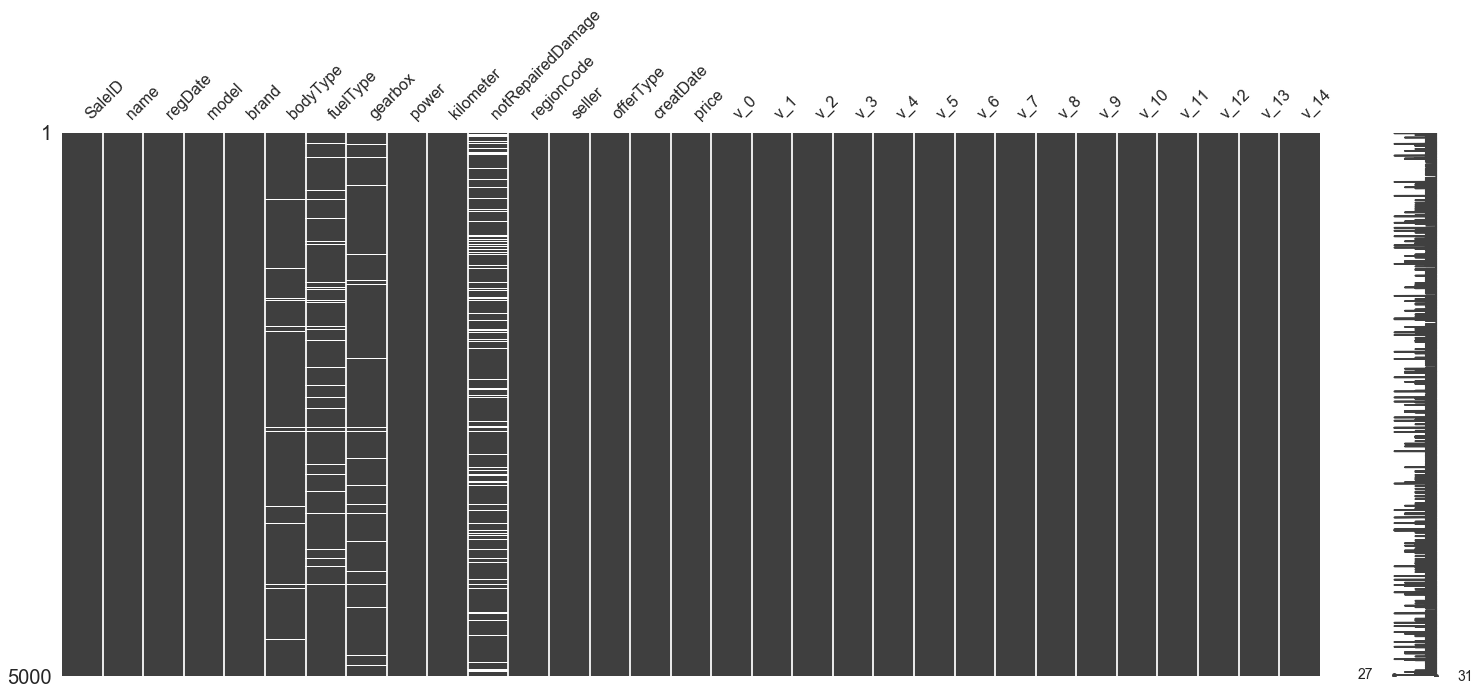

In [20]:
msno.matrix(train.sample(5000))

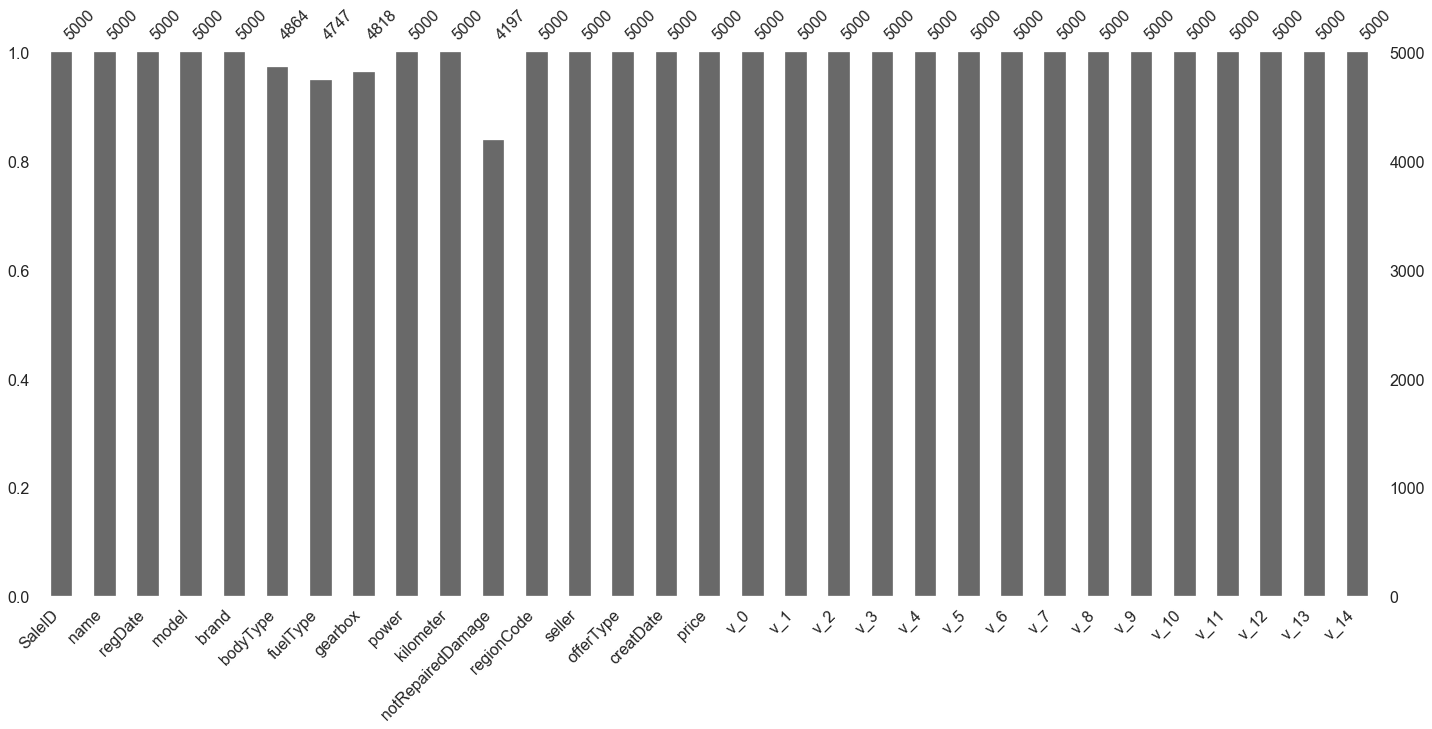

In [21]:
msno.bar(train.sample(5000))

## 5) 预测值分布

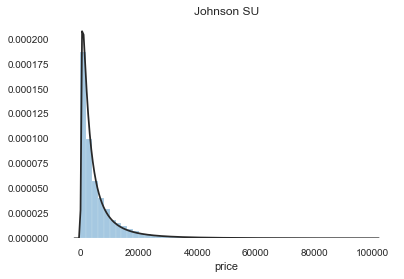

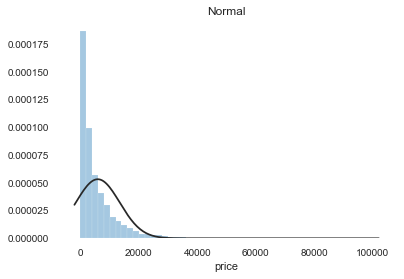

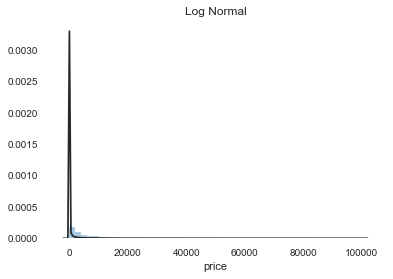

In [22]:
import scipy.stats as st
y = train['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

价格不服从正态分布，所以在进行回归之前，它必须进行转换。虽然对数变换做得很好，但最佳拟合是无界约翰逊分布

### 5.1)查看skewness and kurtosis

Skewness: 3.346487
Kurtosis: 18.995183


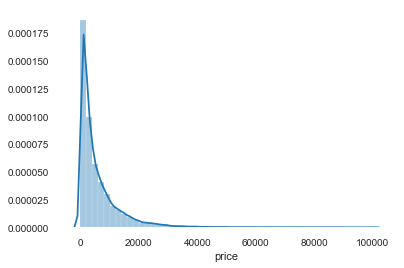

In [23]:
sns.distplot(train['price']);
print("Skewness: %f" % train['price'].skew())
print("Kurtosis: %f" % train['price'].kurt())

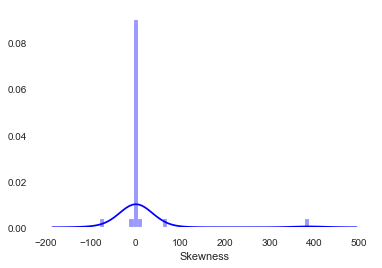

In [24]:
sns.distplot(train.skew(),color='blue',axlabel ='Skewness')

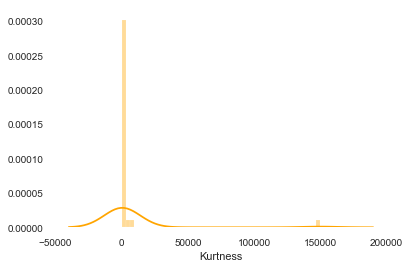

In [25]:
sns.distplot(train.kurt(),color='orange',axlabel ='Kurtness')

### 5.2) 偏态调整

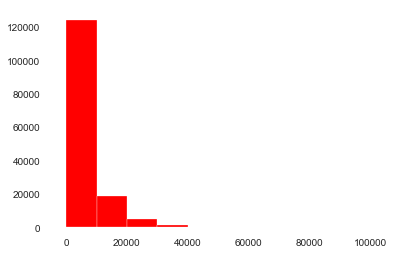

Percentage of price below 20000: 95.15%


In [26]:
plt.hist(train['price'], orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()
print("Percentage of price below 20000: {:.2f}%".format(100 * sum(train['price'] < 20000) / train.shape[0]))

大部分价格都为20000以下

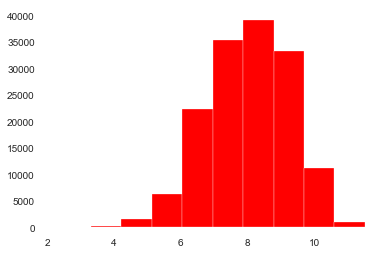

In [27]:
# log变换 z之后的分布较均匀，可以进行log变换进行预测，这也是预测问题常用的trick
plt.hist(np.log(train['price']), orientation = 'vertical',histtype = 'bar', color ='red') 
plt.show()

# 6) 特征分类：类别特征和数字特征

In [28]:
# 分离label即预测值
y_train = train['price']

In [29]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]

categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode',]

In [30]:
# 特征nunique分布
for cat_fea in categorical_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, train[cat_fea].nunique()))
    print(train[cat_fea].value_counts())
    break # 只显示一个就行了

name的特征分布如下：
name特征有个99662不同的值
708       282
387       282
55        280
1541      263
203       233
         ... 
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64


In [31]:
numeric_features.append('price')

## 6.1) 相关性（数值型变量）

In [32]:
# 与price的相关性
price_numeric = train[numeric_features]
correlation = price_numeric.corr()
print(correlation['price'].sort_values(ascending = False),'\n')

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64 



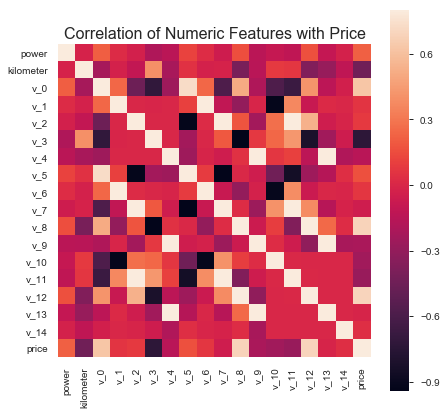

In [33]:
f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

In [37]:
# del price_numeric['price']
## 2) 查看几个特征得 偏度和峰值
for col in numeric_features:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(train[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(train[col].kurt())  
         )

power           Skewness: 65.86     Kurtosis: 5733.45
kilometer       Skewness: -1.53     Kurtosis: 001.14
v_0             Skewness: -1.32     Kurtosis: 003.99
v_1             Skewness: 00.36     Kurtosis: -01.75
v_2             Skewness: 04.84     Kurtosis: 023.86
v_3             Skewness: 00.11     Kurtosis: -00.42
v_4             Skewness: 00.37     Kurtosis: -00.20
v_5             Skewness: -4.74     Kurtosis: 022.93
v_6             Skewness: 00.37     Kurtosis: -01.74
v_7             Skewness: 05.13     Kurtosis: 025.85
v_8             Skewness: 00.20     Kurtosis: -00.64
v_9             Skewness: 00.42     Kurtosis: -00.32
v_10            Skewness: 00.03     Kurtosis: -00.58
v_11            Skewness: 03.03     Kurtosis: 012.57
v_12            Skewness: 00.37     Kurtosis: 000.27
v_13            Skewness: 00.27     Kurtosis: -00.44
v_14            Skewness: -1.19     Kurtosis: 002.39
price           Skewness: 03.35     Kurtosis: 019.00


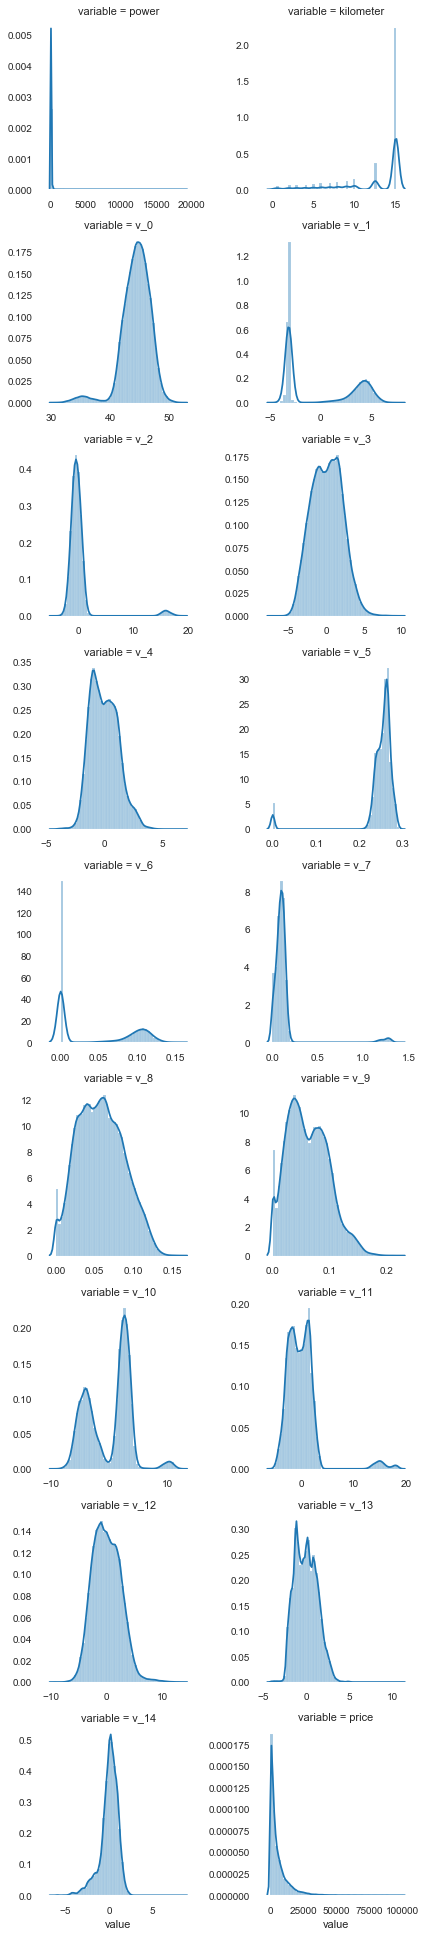

In [38]:
## 3) 每个数字特征得分布可视化
f = pd.melt(train, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

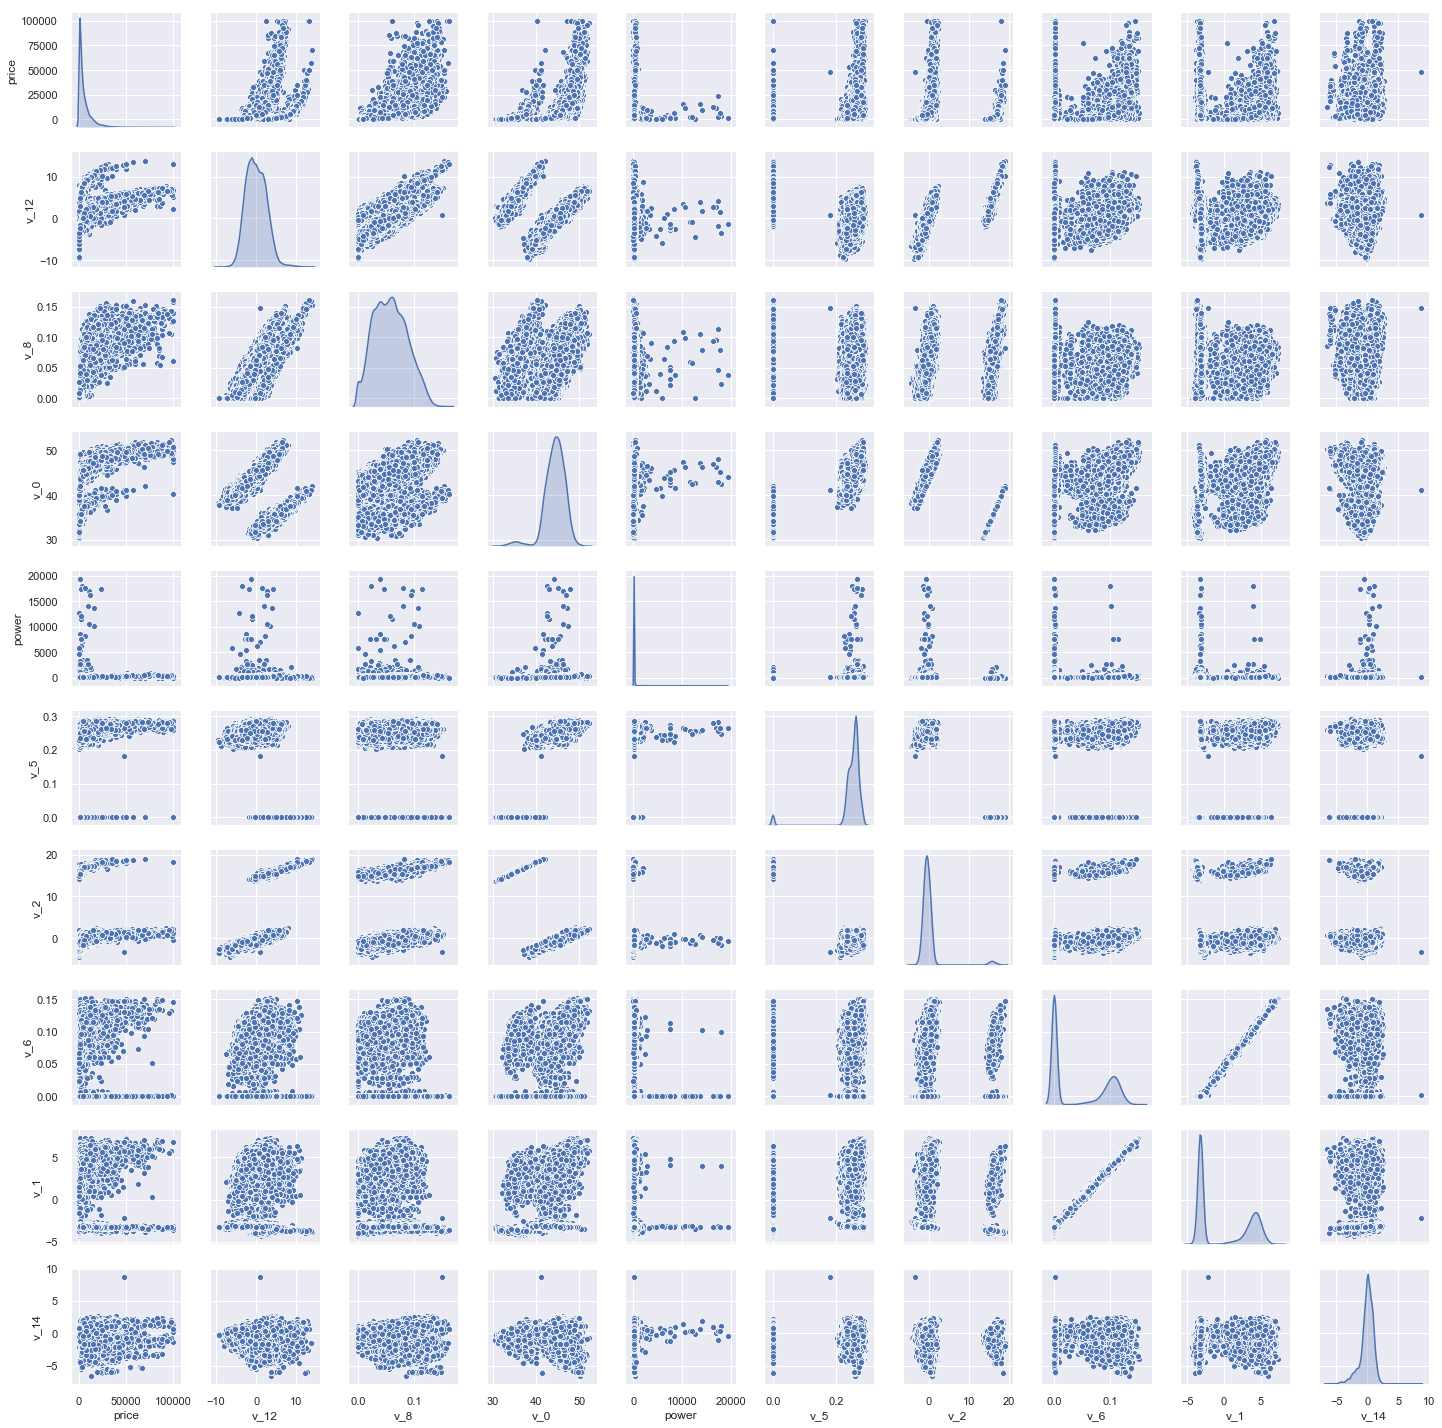

In [39]:
## 4) 数字特征相互之间的关系可视化
sns.set()
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(train[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

# 用pandas_profiling生成数据报告

In [41]:
# import pandas_profiling

In [42]:
# pfr = pandas_profiling.ProfileReport(train[numeric_features])

KeyboardInterrupt: 

In [ ]:
# pfr.to_file("./example.html")